In [5]:
def bollingerBands(a, n=20):
    sma = np.nansum(a) / n
    std = np.std(a)
    return sma, sma + 2 * std, sma - 2 * std


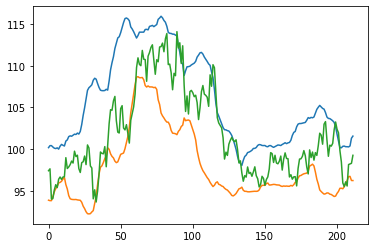

In [7]:
import numpy as np
import matplotlib.pyplot as plt


# Parameters
# simulation dependent
S0 = 100.0             # asset price
T = 1.0                # time in years
r = 0.02               # risk-free rate
N = 252                # number of time steps in simulation
M = 1               # number of simulations
# Heston dependent parameters
kappa = 3              # rate of mean reversion of variance under risk-neutral dynamics
theta = 0.20**2        # long-term mean of variance under risk-neutral dynamics
v0 = 0.25**2           # initial variance under risk-neutral dynamics
rho = 0.7              # correlation between returns and variances under risk-neutral dynamics
sigma = 0.6            # volatility of volatility
#theta, v0


def heston_model_sim(S0, v0, rho, kappa, theta, sigma,T, N, M):
    """
    Inputs:
     - S0, v0: initial parameters for asset and variance
     - rho   : correlation between asset returns and variance
     - kappa : rate of mean reversion in variance process
     - theta : long-term mean of variance process
     - sigma : vol of vol / volatility of variance process
     - T     : time of simulation
     - N     : number of time steps
     - M     : number of scenarios / simulations
    
    Outputs:
    - asset prices over time (numpy array)
    - variance over time (numpy array)
    """
    # initialise other parameters
    dt = T/N
    mu = np.array([0,0])
    cov = np.array([[1,rho],
                    [rho,1]])

    # arrays for storing prices and variances
    S = np.full(shape=(N+1,M), fill_value=S0)
    v = np.full(shape=(N+1,M), fill_value=v0)

    # sampling correlated brownian motions under risk-neutral measure
    Z = np.random.multivariate_normal(mu, cov, (N,M))

    for i in range(1,N+1):
        S[i] = S[i-1] * np.exp( (r - 0.5*v[i-1])*dt + np.sqrt(v[i-1] * dt) * Z[i-1,:,0] )
        v[i] = np.maximum(v[i-1] + kappa*(theta-v[i-1])*dt + sigma*np.sqrt(v[i-1]*dt)*Z[i-1,:,1],0)
    
    return S, v

rho_p = 0.98
rho_n = -0.98
St,v = heston_model_sim(S0, v0, rho_p, kappa, theta, sigma,T, N, M)



upperBand, lowerBand = np.zeros(N), np.zeros(N)
for i in range(1,N-20):
    _, upperBand[i], lowerBand[i] = bollingerBands(St[i:i+20])
plt.plot(upperBand[20:N-20])
plt.plot(lowerBand[20:N-20])
plt.plot(St[20:N-20])
plt.show()



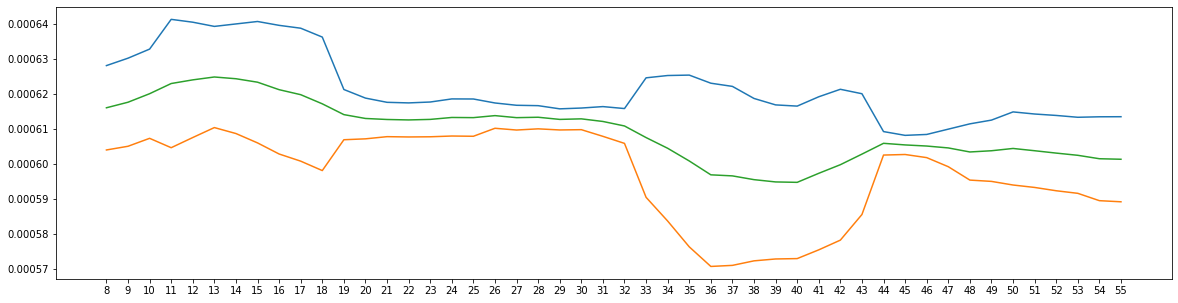

0.000618665170425921
0.000595484639625
0.0005723041088240789
2.3180530800921044e-05
2.3180530800921044e-05


In [49]:
St = np.array([0.00061148455,
0.0006092928039999999,
0.000617293814,
0.000611538987,
0.0006115963879999999,
0.0006174897299999999,
0.0006207040819999999,
0.0006286246329999999,
0.0006241681679999999,
0.0006287357409999999,
0.0006405609089999999,
0.000619900487,
0.000618164394,
0.000613494939,
0.000612809645,
0.0006115403579999999,
0.0006127360549999999,
0.0006078548099999999,
0.000615909526,
0.0006111092329999999,
0.0006158266419999999,
0.0006124816999999999,
0.000614032443,
0.000615943546,
0.0006123624739999999,
0.000612440549,
0.0006112802589999999,
0.0006120295789999999,
0.00061091225,
0.000613737835,
0.0006080593749999999,
0.000605659884,
0.0005858563029999999,
0.0005879966559999999,
0.000582291005,
0.000580388532,
0.000608489908,
0.000605135454,
0.000602848825,
0.000604708822,
0.0006065087119999999,
0.0006076422769999999,
0.0006064712149999999,
0.000605053533,
0.000604815821,
0.000602598821,
0.0005985320279999999,
0.0005954787209999999,
0.0006092914219999999,
0.0006128698209999999,
0.000601291147,
0.0005996418209999999,
0.000599781487,
0.0005947740369999999,
0.000597334202,
0.000600073227,
0.0006024313109999999,
0.000601776484,
0.0005940106329999999,
0.000610576078,
0.000558585306,
0.0005522036739999999,
0.000548771378,
0.000547258417,
])

k=8
N=St.size

plt.rcParams['figure.figsize'] = [20, 5]

sma, upperBand, lowerBand = np.zeros(N), np.zeros(N), np.zeros(N)
for i in range(k,N-k):
    sma[i], upperBand[i], lowerBand[i] = bollingerBands(St[i-k:i],k)
plt.plot(upperBand[k:N-k])
plt.plot(lowerBand[k:N-k])
plt.plot(sma[k:N-k])
#plt.plot(St[k:N-k])
plt.xticks(range(0,N-2*k), range(k,N-k))
plt.show()

print(upperBand[38])
print(sma[38])
print(lowerBand[38])
print(sma[38]-lowerBand[38])
print(-sma[38]+upperBand[38])


# for i in range(0,N):
#     print(f"{i}: {lowerBand[i]}")
